In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('merged_dataset.csv')

In [4]:
print(df.columns)


Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [5]:
df.drop(columns=['Flow ID','Src IP','Dst IP', 'Timestamp'], inplace=True)

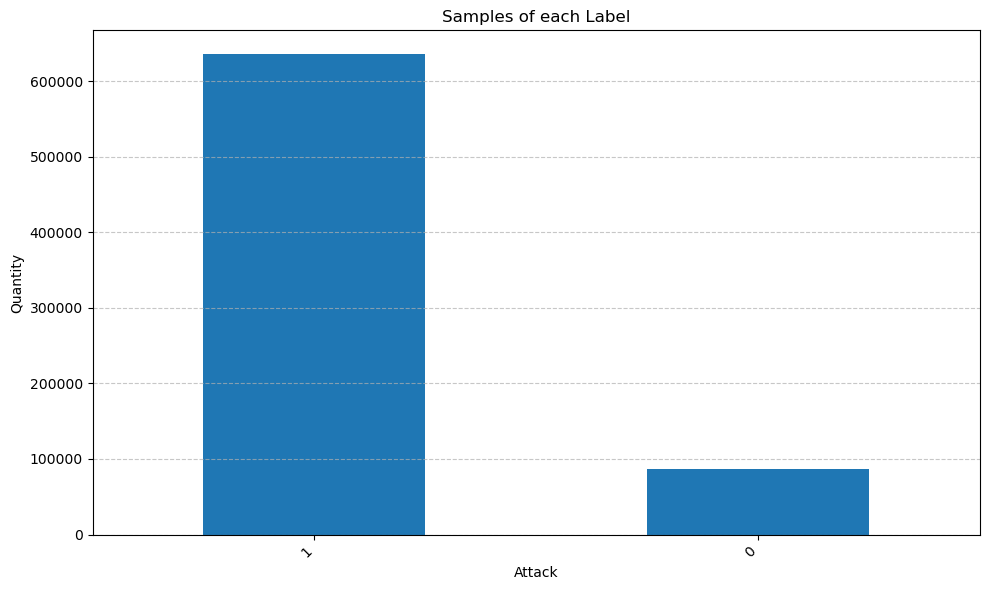

In [20]:
import matplotlib.pyplot as plt

# Đếm số lượng từng nhãn
label_counts = df['Label'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
label_counts.plot(kind='bar')

plt.title('Samples of each Label')
plt.xlabel('Attack')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
df.drop(columns=['Attack Name'], inplace=True)

In [13]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,34908,443,6,24402,13,9,737.0,6143.0,517.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,40410,443,6,29719,21,12,736.0,34635.0,517.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,48448,443,6,26746,19,13,736.0,34635.0,517.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50762,443,6,3980,1,1,24.0,0.0,24.0,24.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,58982,443,6,404211,11,10,720.0,6169.0,517.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
from sklearn.utils import resample

# Chia theo lớp
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Undersample lớp majority
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Gộp lại
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [17]:
df_balanced['Label'].value_counts()

Label
1    86525
0    86525
Name: count, dtype: int64

In [18]:
df_balanced.to_csv('proccessed_dataset.csv', index=False)